In [1]:
import xarray
import pygmt
import pandas
import numpy as np

In [2]:
ds = xarray.open_dataset("../data/MIROC_outputs/ctrl_MIROC-COSP2.nc")

In [34]:
print(ds.info())

xarray.Dataset {
dimensions:
	loc = 32768 ;
	tau7 = 7 ;
	bnds = 2 ;
	pres7 = 7 ;
	hgt16 = 16 ;
	lev = 40 ;
	cosp_scol = 140 ;
	levStat = 40 ;
	SR_BINS = 15 ;
	PARASOL_NREFL = 5 ;
	cloudsat_DBZE_BINS = 15 ;
	REICE_MODIS = 8 ;
	RELIQ_MODIS = 8 ;
	CFODD_NICOD = 30 ;
	CFODD_NDBZE = 25 ;

variables:
	float32 longitude(loc) ;
		longitude:long_name = longitude ;
		longitude:units = degrees_east ;
		longitude:standard_name = longitude ;
	float32 latitude(loc) ;
		latitude:long_name = latitude ;
		latitude:units = degrees_north ;
		latitude:standard_name = latitude ;
	float32 tau7_bnds(tau7, bnds) ;
		tau7_bnds:long_name = cloud_optical_depth_bin_edges ;
		tau7_bnds:units = 1 ;
		tau7_bnds:standard_name = atmosphere_optical_thickness_due_to_cloud ;
	float32 pres7_bnds(pres7, bnds) ;
		pres7_bnds:long_name = air_pressure_bin_edges ;
		pres7_bnds:units = Pa ;
		pres7_bnds:standard_name = air_pressure ;
	float32 hgt16_bnds(hgt16, bnds) ;
		hgt16_bnds:long_name = altitude_bin_edges ;
		hgt16_bnds:u

In [3]:
vname='cllatlid'

In [4]:
%%capture
var=ds[vname].values
lat=ds["latitude"].values
lon=ds["longitude"].values
data = np.column_stack([lon, lat, var])

In [27]:
fig = pygmt.Figure()
region = [-180, 180, -75, 75]

In [28]:
tbl_block = pygmt.blockmean(
    data=data,
    region=region,
    spacing="1.5d"
)

grid = pygmt.surface(
    data=tbl_block,
    region=region,
    spacing="1.5d"
)

surface [WARNING]: Input data lie exactly on a plane.


In [29]:
gxyz = pygmt.xyz2grd(
    data=data,
    region=region,
    spacing="1.5d",
)

In [30]:
fig.coast(
    region=region,
    projection="W15c",
    frame="afg",
    land="lightgray",
    water="white"
)


In [31]:
fig.grdimage(
    grid=gxyz,
    cmap="viridis"
)

In [32]:
fig.colorbar(frame='af+l"Total Cloud Cover (%)"')

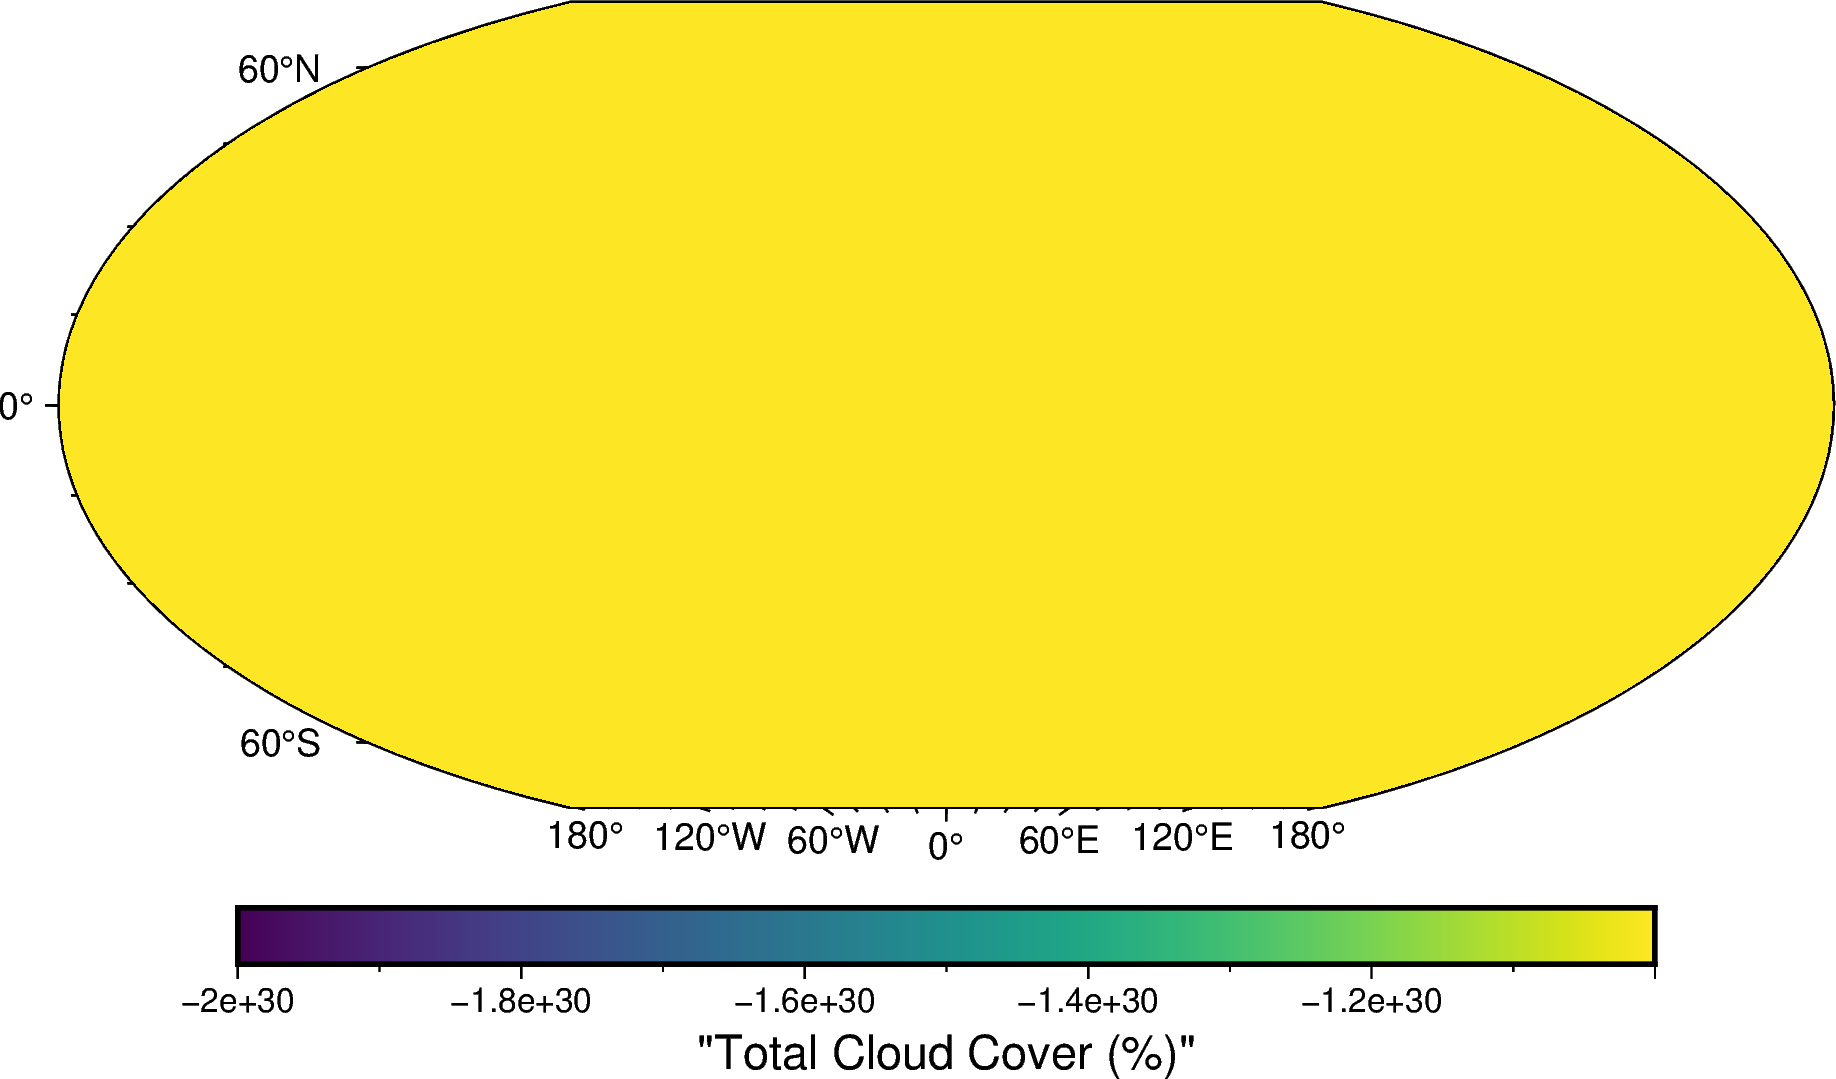

In [33]:
fig.show(width="80%")